#  Data Analysis and Report Notebook
November 6, 2025
Sarah Innis

## Load Packages

In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

## Load in the Data

Bring in and preview Seattle Building Permits data.

In [76]:
permits = pd.read_csv('data/Building_Permits_20251106.csv')
permits.head()

C:\Users\sarah\AppData\Local\Temp\ipykernel_19872\4127347995.py:1: DtypeWarning: Columns (25,26,27,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('data/Building_Permits_20251106.csv')


,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,InitialReviewCompleteDate,PlanReviewCompleteDate,DaysIssuePermitCity,ReadyToIssueDate,Zoning,DwellingUnitType,StandardPlan,DependentBuilding,ParentPermitNum,HousingCategory
0,3001776-EX,Commercial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,3002256-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANCELLED 3/8...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,3002287-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,3003446-EX,Industrial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Shoreline Exemption,Exception/Exemption Request for: CANCELLED 3/2...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,3003449-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANCELED PER ...,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


Fix all the columns that are a number of days so the datatype is numeric.

In [77]:
cols_to_clean = ['TotalDaysPlanReview', 'DaysInitialPlanReview', 'DaysPlanReviewCity', 'DaysIssuePermitCity']

permits[cols_to_clean] = permits[cols_to_clean].apply(
    lambda s: pd.to_numeric(s.astype(str).str.replace(',', ''), errors='coerce')
)


InitialReviewCompleteDate should be a timestamp

In [78]:
permits['InitialReviewCompleteDate'] = pd.to_datetime(permits['InitialReviewCompleteDate'], format='%Y %b %d %I:%M:%S %p', errors = 'coerce')

Bring in and preview the Seattle City Council Districts data.

In [79]:
council = gpd.read_file('data/council_districts/council_districts_10_20_PL.shp')

In [80]:
print(council.head())
print(council.columns)
print(council.crs)

   COUNCIL_DI  F2010_PL_d  F2010_PL_1  F2010_PL_2  F2010_PL_3  F2010_PL_4  \
0           1       91111       86176       65612        6741        1091   
1           2       92186       86819       29009       19759         747   
2           3       85032       80719       61595        9171         543   
3           7       71223       68088       56104        3657         664   
4           6       89496       85624       77846        1326         491   

   F2010_PL_5  F2010_PL_6  F2010_PL_7  F2010_PL_8  ...  F2000_P_10  \
0        8700         609        3423        4935  ...         267   
1       32908         675        3721        5367  ...         264   
2        7423         210        1777        4313  ...         258   
3        6419         186        1058        3135  ...         140   
4        4747         141        1073        3872  ...         241   

   F2000_P_11  F2000_PL_M  F2000_P_12  F2000_P_13  F2000_PL_U  F2000_P_14  \
0        3561       26628       69467  

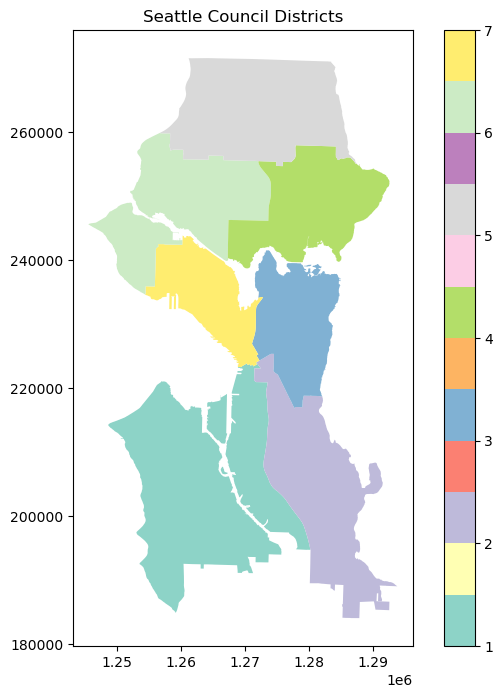

In [81]:
fig, ax = plt.subplots(figsize=(8,8))
council.plot(ax=ax, column='COUNCIL_DI', cmap='Set3', legend=True)
plt.title("Seattle Council Districts")
plt.show()


## Learning about the Permits

Fields
- PermitNum (Text): unique permit number 
- PermitClass (Text): The type of project. Single Family/Duplex, Commercial, Multifamily, Institutional, Industrial, Vacant Land
- PermitClassMapped (Text): Residential or Non-Residential
- PermitTypeMapped (Text): Permit Category. Options: Building, ECA and Shoreline Exemption/Street Improvement Exception Request, Demolition, Roof, Grading
- PermitTypeDesc (Text): Additional information about the type of permit. For example, whether it is an addition/alternation or a new project. Around 15 different values.
- Description (Text): Description of work done under this permit
- HousingUnits (Number) : The number of housing units included at the beginning of the project
- HousingUnitsRemoved (Number) : The number of housing units removed during the project
- HousingUnitsAdded (Number) : The number of housing units added during the project
- EstProjectCost (Number) : Estimated project cost defined as parts plus labor
- AppliedDate (Floating Timestamp) : The date SDCI accepted the application as a complete submittal
- IssuedDate (Floating Timestamp) : The date SDCI issued the permit. If not present, it generally means the application is still under review.
- ExpiresDate (Floating Timestamp) : The date the application is due to expire. The date by which work is supposed to be completed.
- CompletedDate (Floating Timestamp) : The date the permit had all its inspections completed. If not present, it generally means the permit is still under inspection
- StatusCurrent (Text) : The most recent process step that was fully completed. Around 20 different values
- RelatedMup (Text) : The land use permit related to the building permit, if there is one
- OriginalAddress1 (Text) : Street name and number of the project
- OriginalCity (Text) : City of the project
- OriginalState (Text) : State of the project
- OriginalZip (Text) : Zip code of the project
- ContractorCompanyName (Text) : The contractor(s) associated with the permit
- Link (URL) : Link to permit information on SDCI website
- Latitude (Number) : Latitude of the worksite
- Longitude (Number) : Longitude of the worksite
- Location1 (Location) : The latitude and longitude location for mapping purposes
- TotalDaysPlanReview (Number) : Number of days between AppliedDate and the date SDCI completed all plan reviews
- DaysInitialPlanReview (Number) : Number of days between AppliedDate and when the initial plan review was completed
- DaysPlanReviewCity (Number) : Number of days between AppliedDate and when all plan reviews were completed
- DaysOutCorrections (Number) : Number of days applicant took to correct permit application when all plan reviews were completed
- NumberReviewCycles (Number) : Number of review cycles for this permit
- InitialReivewCompleteDate (Floating Timestamp) : date SDCI completed initial plan review
- PlanReviewCompleteDate (Floating Timestamp) : date SDCI completed all plan reviews
- DaysIssuePermitCity (Number) : number of days city had permit between AppliedDate and issue date
- ReadyToIssueDate (Floating Timestamp) : The date SDCI is ready to issue the permit, pending payment of final permit fees
- Zoning (Text) : The zoning code for the project location 
- DwellingUnitType (Text) : Type of housing being built
- StandardPlan (Text) : whether this permit uses a pre-approved DADU plan
- DependentBuilding (Text) : whether this permit is dependent on another permit application
- ParentPermitNum (Text) : The permit number of the overarching permit related to this building permit
- HousingCategory (Text) : Type of created housing


What is the total number of permits in this database?

In [82]:
permits.shape[0]

185427

What are the total number of residential permits where the application was completed between 2014 and 2024?

In [100]:
res_permits = permits[permits['PermitClassMapped'] == 'Residential']

In [101]:
res_permits = res_permits.copy()
res_permits['AppliedDate'] = pd.to_datetime(res_permits['AppliedDate'])
res_permits['AppliedYear'] = res_permits['AppliedDate'].dt.year.astype('Int64')
res_permits['IssuedDate'] = pd.to_datetime(res_permits['IssuedDate'])
res_permits['IssuedYear'] = res_permits['IssuedDate'].dt.year.astype('Int64')
permits_filtered = res_permits[(res_permits['AppliedYear'] >= 2014) & (res_permits['AppliedYear'] <= 2024)]
permits_filtered.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,DaysIssuePermitCity,ReadyToIssueDate,Zoning,DwellingUnitType,StandardPlan,DependentBuilding,ParentPermitNum,HousingCategory,AppliedYear,IssuedYear
660,6062967-PH,Multifamily,Residential,Building,New,Phased project: Construction of a residential...,14,0.0,14.0,"3,203,426",...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2014,2021
2450,6074150-CN,Single Family/Duplex,Residential,Building,New,Establish use for and construct new single fam...,1,0.0,1.0,"488,574",...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2014,2017
3149,6073452-CN,Multifamily,Residential,Building,New,Construct Duplex Dwelling with Attached garage...,2,0.0,2.0,"400,000",...,NaN,NaN,LR2,Rowhouse,0.0,0,NaN,Middle Housing,2014,2014
4136,6078193-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Construct an accessory structure in the yard p...,0,NaN,NaN,"5,475",...,NaN,NaN,NaN,NaN,NaN,0,NaN,Single-Family Add/Alt,2014,2014
9649,6101379-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Construct addition to existing single family r...,0,NaN,NaN,"9,000",...,NaN,NaN,NaN,NaN,NaN,0,NaN,Single-Family Add/Alt,2015,2015


In [102]:
permits_filtered.shape[0]

58413

How has the number of permits received changed over time?

<Axes: xlabel='AppliedYear'>

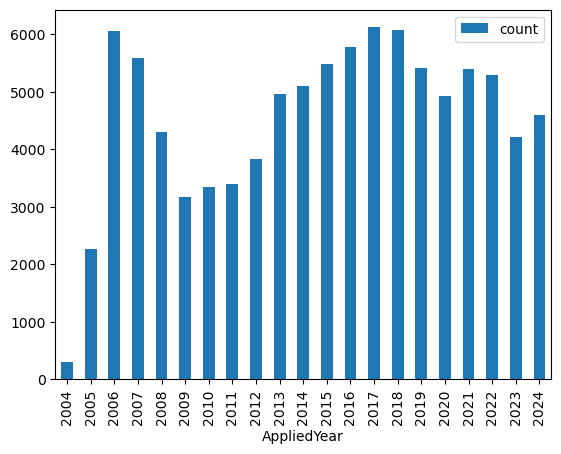

In [ ]:
# permits_by_year = (
#     permits_filtered['AppliedYear']
#     .value_counts()
#     .sort_index()
#     .rename_axis('AppliedYear')
#     .reset_index(name='count')
# )

# permits_by_year.plot(x='AppliedYear', y='count', kind='bar')


How has the number of permits received and completed changed over time?

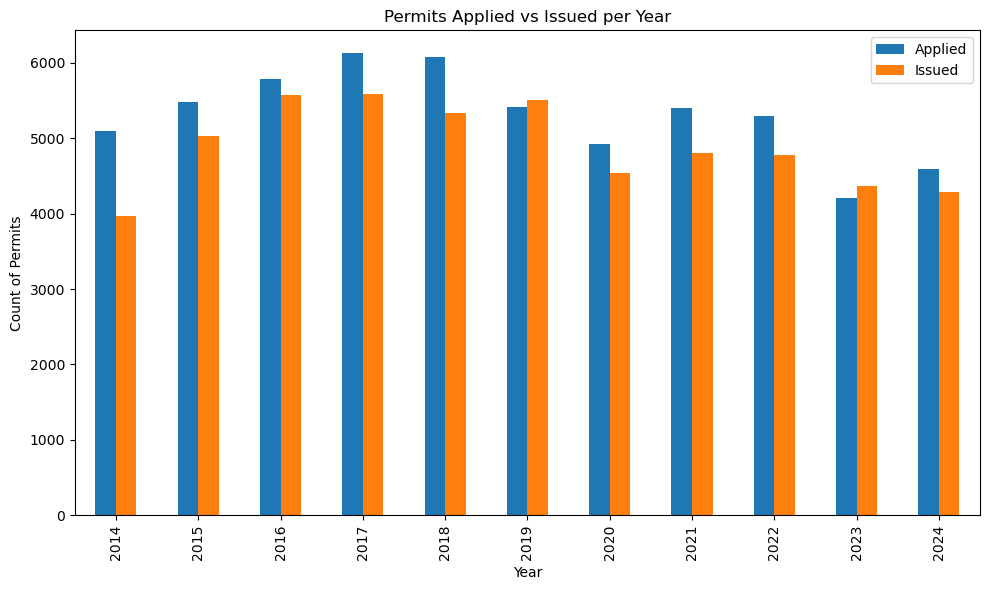

In [103]:
applications_by_year = (
    permits_filtered['AppliedYear']
    .value_counts()
    .sort_index()
    .rename_axis('Year')
    .reset_index(name='ApplicationCount')
)

issued_by_year = (
    permits_filtered['IssuedYear']
    .value_counts()
    .sort_index()
    .rename_axis('Year')
    .reset_index(name='IssuedCount')
)

permits_by_year = pd.merge(applications_by_year, issued_by_year, how = 'inner')

permits_by_year.plot(x = 'Year', kind='bar', figsize=(10,6))
plt.title("Permits Applied vs Issued per Year")
plt.xlabel("Year")
plt.ylabel("Count of Permits")
plt.legend(["Applied", "Issued"])
plt.tight_layout()
plt.show()


Between 2014 and 2024, how many permits were to remove residential housing?

In [106]:
demolition = permits_filtered[permits_filtered['PermitTypeMapped'] == 'Demolition']
demolition.shape[0]

6481

Between 2014 and 2024, how many permits were to add residential housing?

In [104]:
building = permits_filtered[permits_filtered['PermitTypeMapped'] == 'Building']
building.shape[0]

51768

Between 2014 and 2024, how many additional units were proposed?

In [111]:
units_added = int(permits_filtered['HousingUnitsAdded'].sum())
units_added

108251

Between 2014 and 2024, how many housing units were removed?

In [113]:
units_removed = int(permits_filtered['HousingUnitsRemoved'].sum())
units_removed

7175

What is the net number of new units?

In [114]:
net_num_units = units_added - units_removed
net_num_units

101076

Where are new units going?

In [115]:
permits_filtered['Location1'].head()

660     (47.62218901, -122.32586296)
2450    (47.63827548, -122.41029984)
3149    (47.62206462, -122.29870965)
4136    (47.71183688, -122.29537883)
9649    (47.64888031, -122.37194912)
Name: Location1, dtype: object

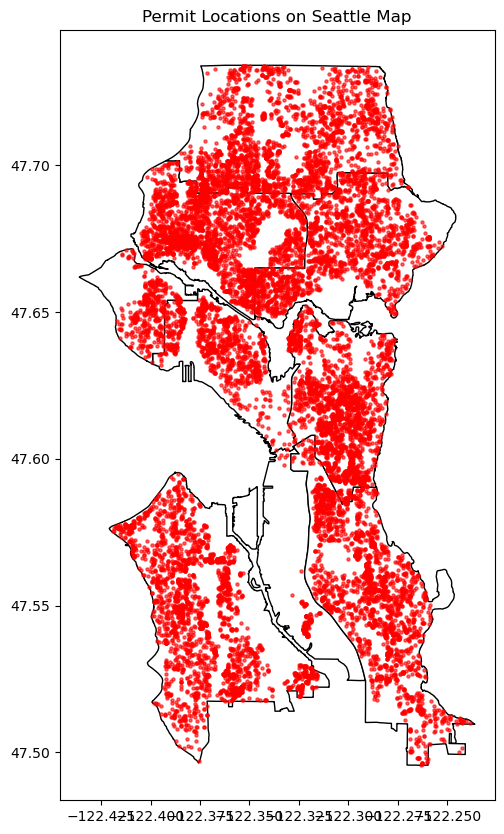

In [117]:
from shapely.geometry import Point

permits_filtered_2 = permits_filtered[permits_filtered['HousingUnitsAdded'] > 0]

# 3. Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(permits_filtered_2['Longitude'], permits_filtered_2['Latitude'])]
permits_gdf = gpd.GeoDataFrame(permits_filtered_2, geometry=geometry, crs="EPSG:4326")

# 4. Plot
fig, ax = plt.subplots(figsize=(10,10))
council.to_crs(epsg=4326).plot(ax=ax, color='white', edgecolor='black')
permits_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6)
plt.title("Permit Locations on Seattle Map")
plt.show()


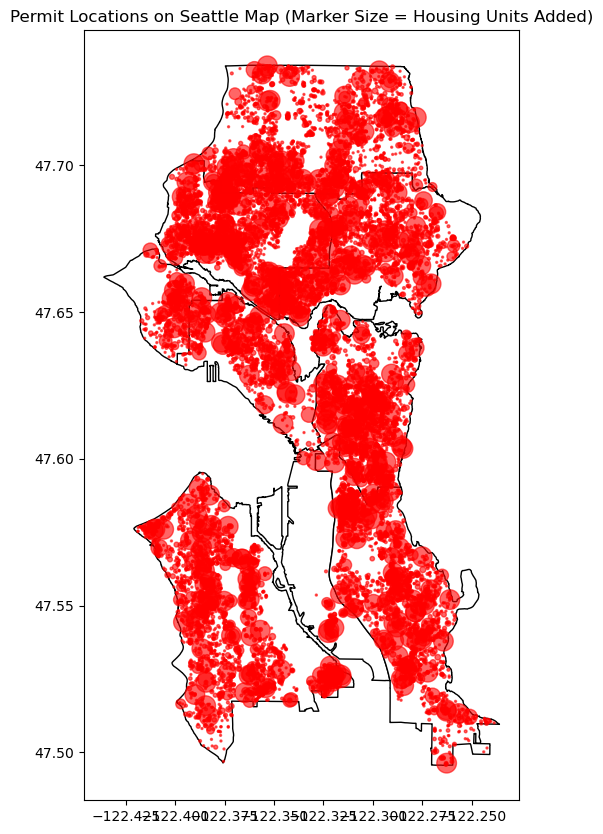

In [118]:
# Scale marker sizes — adjust divisor to tune visual balance
marker_sizes = permits_gdf['HousingUnitsAdded'] * 2
# Optional: limit extreme outliers
marker_sizes = marker_sizes.clip(upper=200)

# Plot
fig, ax = plt.subplots(figsize=(10,10))
council.to_crs(epsg=4326).plot(ax=ax, color='white', edgecolor='black')
permits_gdf.plot(
    ax=ax,
    color='red',
    markersize=marker_sizes,
    alpha=0.6
)
plt.title("Permit Locations on Seattle Map (Marker Size = Housing Units Added)")
plt.show()

Visualize whether City Council districts have different numbers of housing units being added.

Filter for permits where housing units are being added.

In [120]:
permits_filtered_2 = permits_filtered[permits_filtered['HousingUnitsAdded'] > 0]

Generate a geodataframe from permits data.

In [121]:
geometry = [Point(xy) for xy in zip(permits_filtered_2['Longitude'], permits_filtered_2['Latitude'])]
permits_gdf = gpd.GeoDataFrame(permits_filtered_2, geometry=geometry, crs="EPSG:4326")

Perform a spatial join to assign each permit to a council district.

In [126]:
permits_with_district = gpd.sjoin(permits_gdf, council.to_crs(epsg=4326), how = 'inner', predicate = 'within')

Count added housing units by council district.

In [127]:
units_by_district = permits_with_district.groupby('COUNCIL_DI')['HousingUnitsAdded'].sum().reset_index()

Add housing additions to the council GeoDataFrame.

In [128]:
council_units = council.merge(units_by_district, on = 'COUNCIL_DI', how = 'left')
council_units['HousingUnitsAdded'] = council_units['HousingUnitsAdded'].fillna(0)

Plot number of housing units added per council district.

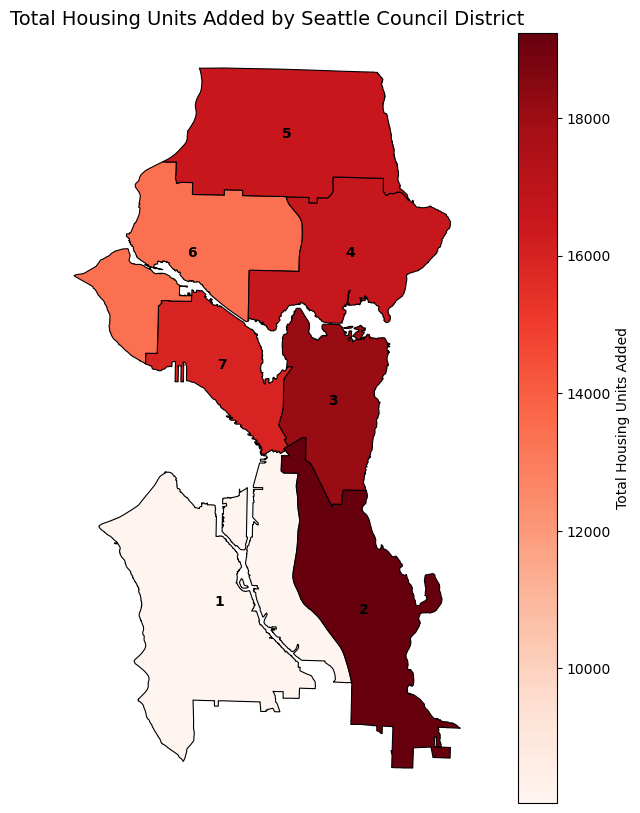

In [130]:
fig, ax = plt.subplots(figsize=(10, 10))
council_units.plot(
    column='HousingUnitsAdded',
    cmap='Reds',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Total Housing Units Added", 'orientation': "vertical"},
    ax=ax
)

# --- 7. Add district numbers as labels ---
for idx, row in council_units.iterrows():
    plt.text(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        str(int(row['COUNCIL_DI'])),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title("Total Housing Units Added by Seattle Council District", fontsize=14)
plt.axis('off')
plt.show()

Next I want to look at this in regards to current population of the neighborhood
maybe create a units change that is units added - units removed
create a residences per person metric. get a number in 2024 and a number in 2014 and see who has experienced the most change